<b>Linear Regression model prediction</b><br>

$$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

<a href= "http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/">Writing Mathematic Fomulars in Markdown</a>

<b>Linear Regression model prediction (vectorized form)</b><br>

$$\hat{y} = h_{\theta}(x) = \theta^T.x$$

* $\hat{y}$ is the predicted value
* n is the number of fatures
* $x_i$ is the $i^{th}$ feature value
* $\theta_j$ is the $j^{th}$ model parameter
* $\theta$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$. 
* $\theta^T$.x is the dot product of $\theta^T$ and x.
* $h_{\theta}$ is the hypothesis function, using the model parameter $\theta$. 

<b>MSE cost function of a Linear Regression</b><br>
MSE(X, $h_\theta$) =  $\frac{1}{m}\sum_{i=1}^{m}{(\theta^T.x^{(i)} - y^{(i)})}^2$

<b>The Normal Equation</b><br>
To find the value of $\theta$ that minimizes the cost function, there is a <i>closed form</i> solution, Normal Equation:
$$\hat{\theta} = {(X^T.X)}^{-1}.X^T.y$$

* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function
* y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
colors = np.random.rand(100)

In [2]:
## Now apply the Normal Equation
X_b = np.c_[np.ones((100, 1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[ 4.02232324],
       [ 3.0519724 ]])

In [4]:
y_pred = X_b.dot(theta_best)

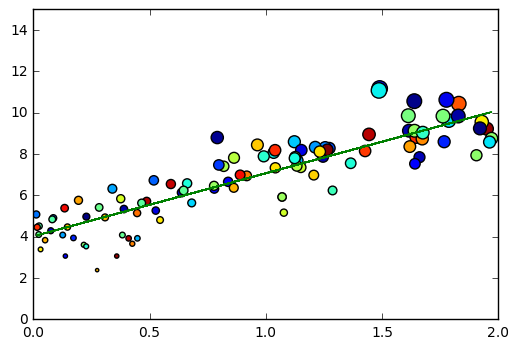

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X, y, c = colors, s = y*y)
plt.plot(X, y_pred, "g-")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# Now Sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X, y)

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.02232324]), array([[ 3.0519724]]))

In [8]:
y_pred = lin_reg.predict(X)

In [9]:
np.sum(np.mod(y_pred, y) > 1)

75

<b>When using Gradient Descent, All feature should be scalerized using Scikit-Learn's StandardScaler class or else it will take much longer to converge. </b>


### Batch Gradient Descent

To compute gradient descent, gradient of cost function to each model parameter $\theta_j$.<br>
<font color = 'green'><b>Partial derivative of the cost function</b></font>
$$\frac{\partial }{\partial \theta_j}{MSE(\theta)} = \frac{2}{m}\sum_{i=1}^{m}{(\theta^T.x^{(i)} - y^{(i)})x_j^{(i)}}$$

$$\overline{\bigvee}_{\theta}MSE({\theta}) = \sum_{i=1}^{n}\frac{\partial }{\partial \theta_i}{MSE(\theta)} = \frac{2}{m}X^T.(X.\theta - y)$$

<b><font color = 'green'>Once you have the gradient descent, which point uphill, just go in the opposite direction to the downhill. <br>
This means subtracting $\overline{\bigvee}_{\theta}MSE({\theta})$ from $\theta$. <br><br>
Gradient Descent step<br></font></b>
$$\theta^{(next step)} = \theta - \eta\overline{\bigvee}_{\theta}MSE({\theta})$$

In [10]:
## Quicker implementation of this algorithm
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[ 4.02232324],
       [ 3.0519724 ]])

<b> Hey, that exactly what the normal equation had found!</b>

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration. <br>
On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down.

In [12]:
##Implementation of Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients

In [13]:
theta

array([[ 4.00850406],
       [ 3.06497752]])

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.03593275]), array([ 3.07250137]))

### Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.<p>
The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima. 

<img src = "GD.png">

### Comparison of algorithms for Linear Regression

<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Large m</th> 
    <th>Out-of-core support</th>
    <th>Large n</th>
    <th>Hyperparams</th>
    <th>Scaling required</th>
    <th>Scikit-Learn</th>
  </tr>
  <tr>
    <td>Normal Equation</td>
    <td>Fast</td>
    <td>No</td> 
    <td>Slow</td>
    <td>0</td>
    <td>No</td> 
    <td>LinearRegression</td>
  </tr>
  <tr>
    <td>Batch GD</td>
    <td>Slow</td>
    <td>No</td> 
    <td>Fast</td>
    <td>2</td>
    <td>Yes</td> 
    <td>n/a</td>
  </tr>
  <tr>
    <td>Stochastic GD</td>
    <td>Fast</td>
    <td>Yes</td> 
    <td>Fast</td>
    <td>>=2</td>
    <td>Yes</td> 
    <td>SGDRegressor</td>
  </tr>
   <tr>
    <td>Mini-Batch GD</td>
    <td>Fast</td>
    <td>Yes</td> 
    <td>Fast</td>
    <td>>=2</td>
    <td>Yes</td> 
    <td>n/a</td>
  </tr>
</table>

### Polynomial Regression